# Assignment 04: Scikit-learn modeling pipeline for regression (Part 2)
## GIS 5092: Applied Machine Learning for GIS and Remote Sensing (Fall 2022)

## Learning Objectives:

* Use automated pipeline to perform step by step serially
* Evaluate results from multiple configuration of models

# How to submit?
Write your answers in places where you see **YOUR ANSWER HERE** within the **#### ... ####** comments. If your answer is code, then use the Code cell, if its text, then use the Text cell. Save a copy of this notebook in your Google Drive by replacing the STUDENT with your SURNAME in CAPS. Then Download the notebook in your computer's hard drive by doing <code>File > Download > Download .ipynb </code>.

---

In [1]:
# Make project folder as current working directory
import os
print(os.getcwd())

C:\Users\syed_


---

In [2]:
os.chdir(r"C:\Users\syed_\OneDrive - Saint Louis University\Machine Learning\Assignment 4")
print(os.getcwd())

C:\Users\syed_\OneDrive - Saint Louis University\Machine Learning\Assignment 4


# Automated Pipeline

In Part 1, we read the data, scaled the feature, reduced dimensionality, and then trained the model with grid search. However, during that process, we had to create several extra variables (for example, scaled data, pca transformed data). Also let's say we want to test the whole thing with standard scaler. To do that, we need to conduct the whole Part 1 again from the standard scaled data.

That's why, sklearn has an automated feature where you can put multiple processing steps in a pipeline and conduct grid search for that pipeline. In this part, we will do the same. At first, let's see how the pipeline works for the same thing we did for part 1 using a pipeline. Next, you will test other configurations using pipelines.

# Read data and create train test dataset

Follow the procedures provided in part 1. You have to read the same data and finally have X_train, y_train, X_test, and y_test as np arrays. **Make sure you remove the noisy bands**. The shape of the np arrays should match with Part 1.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Read the data
data = pd.read_csv('.\data.csv')

In [5]:
lcc = data['LCC'].values

In [6]:
X = data.iloc[:, 103:-200]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.values, lcc, test_size=0.3, random_state=42)

# SVM Pipeline

In [8]:
# Import the module
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
# Define the scaler, pca, and svr objects
minmax_scaler = MinMaxScaler()
pca = PCA()
svr = SVR()

In [11]:
# Define the pipe
# Remember the serial of the steps matter, the first step will be done first
pipe1 = Pipeline(steps=[('scaler', minmax_scaler), ('pca', pca), ('model', svr)])
# Look that in the tuples, we put the name as string (you can call it whatever you want),
# and then define the object
# Based on the given name, we can later control the object's values

In [12]:
# Now the grid search cv object
# The parameter space has to now contain values for all the steps 
# provided in the pipeline

# For scaler, we have no hyperparameters
# For PCA, lets try n_components as 1-6 (we did that manually in part 1)
# For SVR, all same like before in Part 1

# Since this time we have different hyperparameter for different objects,
# we have to use the following way to seperate the objects using double underscore (__) 
parameters = {'pca__n_components': [1, 2, 3, 4, 5],
              'model__kernel': ['linear', 'rbf'],
              'model__C': [0.125, 0.25, 0.5, 1.0, 2.0, 4.0],
              'model__gamma': ['scale', 'auto']}
# See how the __ (double underscore) divides different objects

In [13]:
# Now do the search
grid = GridSearchCV(estimator=pipe1, # Now the estimator is the whole pipe
                    param_grid=parameters,
                    cv=3, # Less cv since its very complex
                    n_jobs=-1)
# Fit
grid.fit(X_train, y_train)

# Predict and calculate the scores
y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MSE:  31.37760625997795
RMSE:  5.601571766922026
R2:  0.48946668620302647


In [14]:
# Now look at the best parameters
grid.best_params_

{'model__C': 4.0,
 'model__gamma': 'scale',
 'model__kernel': 'rbf',
 'pca__n_components': 5}

Look here that the best combinations were the same result as before except the gamma. The best result was found when 'scale' was used. However the R2 difference is not so high. Also we used a cv of 3 here, which may helped resulting in slightly better accumulated model.

Now let's generate the results using Standrad Scaler but keep everything same like before.

In [15]:
# Scaler
standard_scaler = StandardScaler()

# Pipeline
pipe2 = Pipeline(steps=[('scaler', standard_scaler), ('pca', pca), ('model', svr)])

# Parameters
parameters = {'pca__n_components': [1, 2, 3, 4, 5],
              'model__kernel': ['linear', 'rbf'],
              'model__C': [0.125, 0.25, 0.5, 1.0, 2.0, 4.0],
              'model__gamma': ['scale', 'auto']}

# Grid search
grid = GridSearchCV(estimator=pipe2, 
                    param_grid=parameters,
                    cv=3,
                    n_jobs=-1)
# Fit
grid.fit(X_train, y_train)

# Predict and calculate the scores
y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MSE:  34.07557913731074
RMSE:  5.837429154800145
R2:  0.4455689770474385


The result was not as good as with MinMaxScaler. That's why we need to always test multiple configurations of model parameters.

# Your Turn

Create following configurations of pipelines:
- For feature scaling, use no scaling, standard scaling, and minmax scaling
- For dimensionality reduction, use PCA and Truncated SVD (Note: Truncated SVD is the Singular Value Decomposition, another dimensionality reduction technique. [More information](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)) Use 1 - 5 (or 6) as n_components.
- For hyperparameters of the ML models, use the suggestions from the Part 1.
- For each model, there will be 6 pipelines. So finally there will be 24 pipelines.

**DELIVERABLES:**
1. R2, MSE, RMSE scores from the best found combination for each of the four models (PLS, DT, RF, SVM) in a microsoft word document table. Also list the best combinations.
2. Create a scatterplot similar to the one you created in Part 1 with four best models.
3. Save the cv_results from each pipeline as csv.

# PLS Pipelines

In [35]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the PLS object
pls = PLSRegression()

# Define PCA
pca = PCA()

# Pipeline 1: No scaling + PCA
pipe_pls_1 = Pipeline(steps=[('pca', pca), ('model', pls)])
parameters_pls_1 = {
    'pca__n_components': list(range(1, 6)),
    'model__n_components': list(range(1, 5))
}
grid_pipe_pls_1 = GridSearchCV(estimator=pipe_pls_1, param_grid=parameters_pls_1, cv=5, n_jobs=-1)
grid_pipe_pls_1.fit(X_train, y_train)


# Predict and calculate the scores
y_pred_pipe_pls_1 = grid_pipe_pls_1.predict(X_test)
mse_pipe_pls_1 = mean_squared_error(y_test, y_pred_pipe_pls_1)
rmse_pipe_pls_1 = np.sqrt(mse_pipe_pls_1)
r2_pipe_pls_1 = r2_score(y_test, y_pred_pipe_pls_1)

print('MSE: ', mse_pipe_pls_1)
print('RMSE: ', rmse_pipe_pls_1)
print('R2: ', r2_pipe_pls_1)

MSE:  40.83601763044003
RMSE:  6.3903065365004235
R2:  0.33557240694514223


In [133]:
# Now look at the best parameters
grid_pipe_pls_1.best_params_

{'model__n_components': 2, 'pca__n_components': 4}

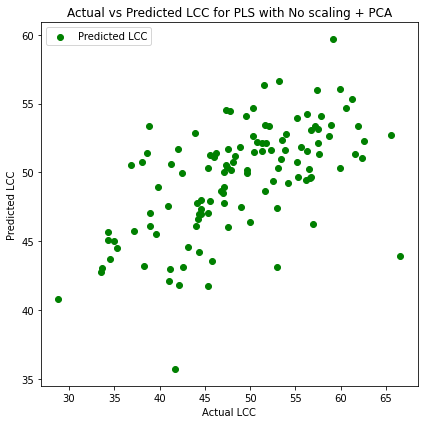

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_pls_1, c='green', label='Predicted LCC')
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal Prediction')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Actual vs Predicted LCC for PLS with No scaling + PCA')
plt.legend(loc='upper left')
#plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_plot_pls_1.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_pls_1.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('pls_1_results.csv', index=False)


In [44]:
# Define Truncated SVD
svd = TruncatedSVD()

# Pipeline 2: No scaling + Truncated SVD
pipe_pls_2 = Pipeline(steps=[('svd', svd), ('model', pls)])
parameters_pls_2 = {
    'svd__n_components': list(range(1, 6)),
    'model__n_components': list(range(1, 5))
}
grid_pipe_pls_2 = GridSearchCV(estimator=pipe_pls_2, param_grid=parameters_pls_2, cv=5, n_jobs=-1)
grid_pipe_pls_2.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_pls_2 = grid_pipe_pls_2.predict(X_test)
mse_pipe_pls_2 = mean_squared_error(y_test, y_pred_pipe_pls_2)
rmse_pipe_pls_2 = np.sqrt(mse_pipe_pls_2)
r2_pipe_pls_2 = r2_score(y_test, y_pred_pipe_pls_2)

print('MSE: ', mse_pipe_pls_2)
print('RMSE: ', rmse_pipe_pls_2)
print('R2: ', r2_pipe_pls_2)



MSE:  40.79419150012861
RMSE:  6.387033074920515
R2:  0.33625294429188146


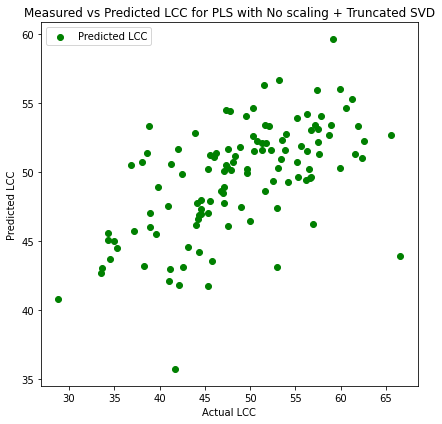

In [46]:

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_pls_2, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for PLS with No scaling + Truncated SVD')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_pls_2.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_pls_2.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('pls_2_results.csv', index=False)


In [134]:
# Now look at the best parameters
grid_pipe_pls_2.best_params_

{'model__n_components': 3, 'svd__n_components': 4}

In [56]:
# Define Standard Scaler
standard_scaler = StandardScaler()

# Pipeline 3: Standard scaling + PCA
pipe_pls_3 = Pipeline(steps=[('scaler', standard_scaler), ('pca', pca), ('model', pls)])
parameters_pls_3 = {
    'pca__n_components': list(range(1, 6)),
    'model__n_components': list(range(1, 5))
}
grid_pipe_pls_3 = GridSearchCV(estimator=pipe_pls_3, param_grid=parameters_pls_3, cv=5, n_jobs=-1)
grid_pipe_pls_3.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_pls_3 = grid_pipe_pls_3.predict(X_test)
mse_pipe_pls_3 = mean_squared_error(y_test, y_pred_pipe_pls_3)
rmse_pipe_pls_3 = np.sqrt(mse_pipe_pls_3)
r2_pipe_pls_3 = r2_score(y_test, y_pred_pipe_pls_3)

print('MSE: ', mse_pipe_pls_3)
print('RMSE: ', rmse_pipe_pls_3)
print('R2: ', r2_pipe_pls_3)




MSE:  31.376725377590546
RMSE:  5.601493138225784
R2:  0.48948101871139493


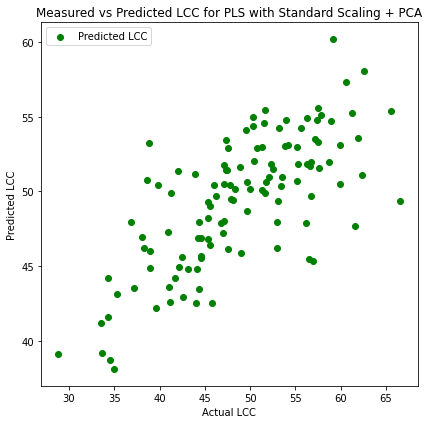

In [57]:

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_pls_3, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for PLS with Standard Scaling + PCA')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_pls_3.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_pls_3.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('pls_3_results.csv', index=False)


In [135]:
# Now look at the best parameters
grid_pipe_pls_3.best_params_

{'model__n_components': 1, 'pca__n_components': 5}

In [53]:
# Define Standard Scaler
standard_scaler = StandardScaler()

# Pipeline 3: Standard scaling + PCA
pipe_pls_4 = Pipeline(steps=[('scaler', standard_scaler), ('svd', svd), ('model', pls)])
parameters_pls_4 = {
    'svd__n_components': list(range(1, 6)),
    'model__n_components': list(range(1, 5))
}
grid_pipe_pls_4 = GridSearchCV(estimator=pipe_pls_4, param_grid=parameters_pls_4, cv=5, n_jobs=-1)
grid_pipe_pls_4.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_pls_4 = grid_pipe_pls_4.predict(X_test)
mse_pipe_pls_4 = mean_squared_error(y_test, y_pred_pipe_pls_4)
rmse_pipe_pls_4 = np.sqrt(mse_pipe_pls_4)
r2_pipe_pls_4 = r2_score(y_test, y_pred_pipe_pls_4)

print('MSE: ', mse_pipe_pls_4)
print('RMSE: ', rmse_pipe_pls_4)
print('R2: ', r2_pipe_pls_4)





MSE:  31.376772692397036
RMSE:  5.60149736163439
R2:  0.48948024886984776


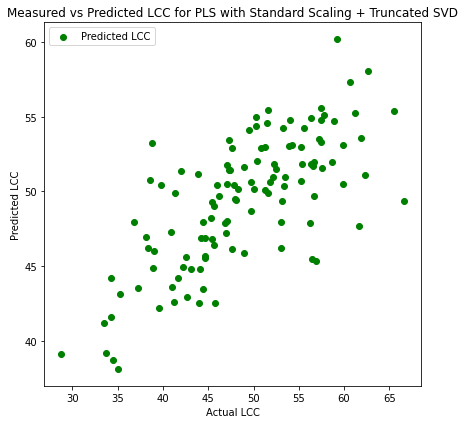

In [54]:

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_pls_4, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for PLS with Standard Scaling + Truncated SVD')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_pls_4.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_pls_4.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('pls_4_results.csv', index=False)


In [136]:
# Now look at the best parameters
grid_pipe_pls_4.best_params_

{'model__n_components': 2, 'svd__n_components': 5}

In [60]:
# Define Standard Scaler
minmax_scaler = MinMaxScaler()

# Pipeline 5: Minmax scaling + PCA
pipe_pls_5 = Pipeline(steps=[('scaler', minmax_scaler), ('pca', pca), ('model', pls)])
parameters_pls_5 = {
    'pca__n_components': list(range(1, 6)),
    'model__n_components': list(range(1, 5))
}
grid_pipe_pls_5 = GridSearchCV(estimator=pipe_pls_5, param_grid=parameters_pls_5, cv=5, n_jobs=-1)
grid_pipe_pls_5.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_pls_5 = grid_pipe_pls_5.predict(X_test)
mse_pipe_pls_5 = mean_squared_error(y_test, y_pred_pipe_pls_5)
rmse_pipe_pls_5 = np.sqrt(mse_pipe_pls_5)
r2_pipe_pls_5 = r2_score(y_test, y_pred_pipe_pls_5)

print('MSE: ', mse_pipe_pls_5)
print('RMSE: ', rmse_pipe_pls_5)
print('R2: ', r2_pipe_pls_5)




MSE:  29.980495181850657
RMSE:  5.4754447474018635
R2:  0.5121985588178143


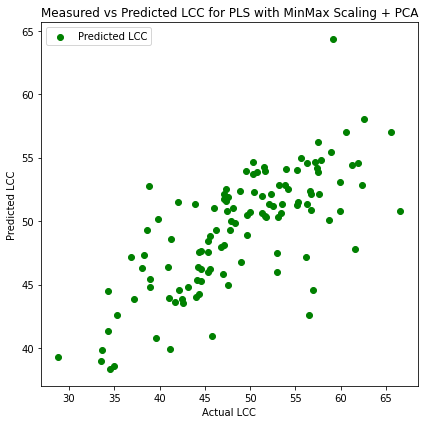

In [61]:

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_pls_5, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for PLS with MinMax Scaling + PCA')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_pls_5.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_pls_5.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('pls_5_results.csv', index=False)


In [137]:
# Now look at the best parameters
grid_pipe_pls_5.best_params_

{'model__n_components': 1, 'pca__n_components': 5}

In [59]:
# Pipeline 6: MinMax scaling + Truncated SVD
pipe_pls_6 = Pipeline(steps=[('scaler', minmax_scaler), ('svd', svd), ('model', pls)])
parameters_pls_6 = {
    'svd__n_components': list(range(1, 6)),
    'model__n_components': list(range(1, 5))
}
grid_pipe_pls_6 = GridSearchCV(estimator=pipe_pls_6, param_grid=parameters_pls_6, cv=5, n_jobs=-1)
grid_pipe_pls_6.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_pls_6 = grid_pipe_pls_6.predict(X_test)
mse_pipe_pls_6 = mean_squared_error(y_test, y_pred_pipe_pls_6)
rmse_pipe_pls_6 = np.sqrt(mse_pipe_pls_6)
r2_pipe_pls_6 = r2_score(y_test, y_pred_pipe_pls_6)

print('MSE: ', mse_pipe_pls_6)
print('RMSE: ', rmse_pipe_pls_6)
print('R2: ', r2_pipe_pls_6)



MSE:  38.57992807863937
RMSE:  6.211274271728739
R2:  0.37228039752798825


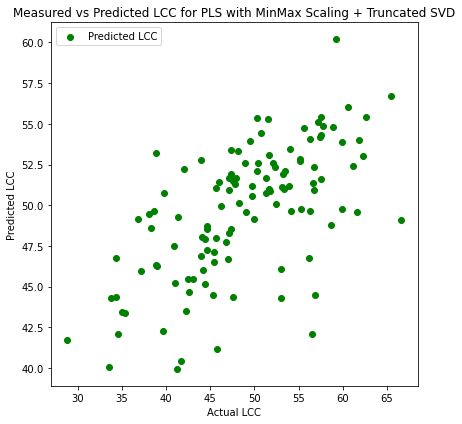

In [62]:

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_pls_6, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for PLS with MinMax Scaling + Truncated SVD')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_pls_6.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_pls_6.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('pls_6_results.csv', index=False)


In [138]:
# Now look at the best parameters
grid_pipe_pls_1.best_params_

{'model__n_components': 2, 'pca__n_components': 4}

In [170]:


# Printing scores for each pipeline for better visualization 

y_preds_pls = [
    grid_pipe_pls_1.predict(X_test),
    grid_pipe_pls_2.predict(X_test),
    grid_pipe_pls_3.predict(X_test),
    grid_pipe_pls_4.predict(X_test),
    grid_pipe_pls_5.predict(X_test),
    grid_pipe_pls_6.predict(X_test)
    
]

# Plotting each scatter plot
for i, y_pred in enumerate(y_preds_pls):

    
    # Calculate and print scores
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Pipeline {i+1} Results for PLS:')
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    print('-----------------------')
    



Pipeline 1 Results for PLS:
MSE:  40.83601763044003
RMSE:  6.3903065365004235
R2:  0.33557240694514223
-----------------------
Pipeline 2 Results for PLS:
MSE:  40.79419150012861
RMSE:  6.387033074920515
R2:  0.33625294429188146
-----------------------
Pipeline 3 Results for PLS:
MSE:  31.376725377590546
RMSE:  5.601493138225784
R2:  0.48948101871139493
-----------------------
Pipeline 4 Results for PLS:
MSE:  31.376772692397036
RMSE:  5.60149736163439
R2:  0.48948024886984776
-----------------------
Pipeline 5 Results for PLS:
MSE:  29.980495181850657
RMSE:  5.4754447474018635
R2:  0.5121985588178143
-----------------------
Pipeline 6 Results for PLS:
MSE:  38.57992807863937
RMSE:  6.211274271728739
R2:  0.37228039752798825
-----------------------


# Decision Tree 

In [130]:
from sklearn.tree import DecisionTreeRegressor

# Define the base estimator
dt = DecisionTreeRegressor()

# Pipeline 1: No scaling + PCA
pipe_dt_1 = Pipeline(steps=[('pca', pca), ('model', dt)])

# Define the parameter search space
parameters_dt_1 = {
    'model__criterion': ['mse', 'mae'],
    'model__max_features': ['auto', 'sqrt', 'log2', None]
    
}

grid_pipe_dt_1 = GridSearchCV(estimator=pipe_dt_1, param_grid=parameters_dt_1, cv=5, n_jobs=-1)
grid_pipe_dt_1.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_dt_1 = grid_pipe_dt_1.predict(X_test)
mse_pipe_dt_1 = mean_squared_error(y_test, y_pred_pipe_dt_1)
rmse_pipe_dt_1 = np.sqrt(mse_pipe_dt_1)
r2_pipe_dt_1 = r2_score(y_test, y_pred_pipe_dt_1)



print('MSE: ', mse_pipe_dt_1)
print('RMSE: ', rmse_pipe_dt_1)
print('R2: ', r2_pipe_dt_1)


MSE:  68.92601694915255
RMSE:  8.30216941221706
R2:  -0.12146948203505015


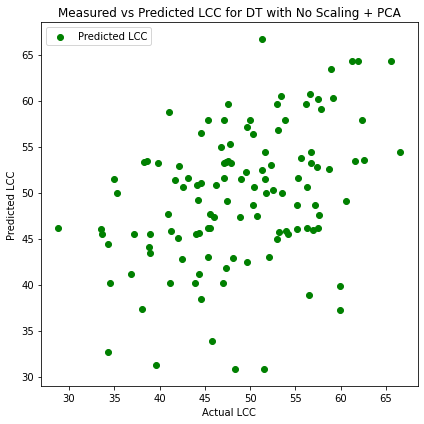

In [67]:

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_dt_1, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for DT with No Scaling + PCA')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_dt_1.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_dt_1.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('dt_1_results.csv', index=False)


In [139]:
# Now look at the best parameters
grid_pipe_dt_1.best_params_

{'model__criterion': 'mse', 'model__max_features': 'auto'}

In [69]:
# Pipeline 2: No scaling + Truncated SVD
pipe_dt_2 = Pipeline(steps=[('svd', svd), ('model', dt)])
grid_pipe_dt_2 = GridSearchCV(estimator=pipe_dt_2, param_grid=parameters_dt_1, cv=5, n_jobs=-1)
grid_pipe_dt_2.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_dt_2 = grid_pipe_dt_2.predict(X_test)
mse_pipe_dt_2 = mean_squared_error(y_test, y_pred_pipe_dt_2)
rmse_pipe_dt_2 = np.sqrt(mse_pipe_dt_2)
r2_pipe_dt_2 = r2_score(y_test, y_pred_pipe_dt_2)

print('MSE: ', mse_pipe_dt_2)
print('RMSE: ', rmse_pipe_dt_2)
print('R2: ', r2_pipe_dt_2)

MSE:  63.700338983050855
RMSE:  7.981249211937368
R2:  -0.036444427326762785


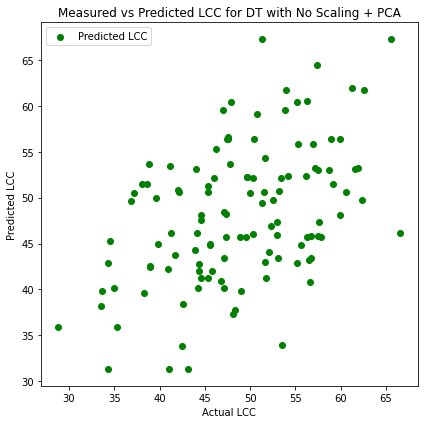

In [70]:

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_dt_2, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for DT with No Scaling + PCA')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_dt_2.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_dt_2.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('dt_2_results.csv', index=False)


In [140]:
# Now look at the best parameters
grid_pipe_dt_2.best_params_

{'model__criterion': 'mse', 'model__max_features': None}

In [71]:
# Pipeline 3: Standard scaling + PCA
pipe_dt_3 = Pipeline(steps=[('scaler', standard_scaler), ('pca', pca), ('model', dt)])
grid_pipe_dt_3 = GridSearchCV(estimator=pipe_dt_3, param_grid=parameters_dt_1, cv=5, n_jobs=-1)
grid_pipe_dt_3.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_dt_3 = grid_pipe_dt_3.predict(X_test)
mse_pipe_dt_3 = mean_squared_error(y_test, y_pred_pipe_dt_3)
rmse_pipe_dt_3 = np.sqrt(mse_pipe_dt_3)
r2_pipe_dt_3 = r2_score(y_test, y_pred_pipe_dt_3)

print('MSE: ', mse_pipe_dt_3)
print('RMSE: ', rmse_pipe_dt_3)
print('R2: ', r2_pipe_dt_3)

MSE:  56.5634745762712
RMSE:  7.52086926998942
R2:  0.07967682824397526


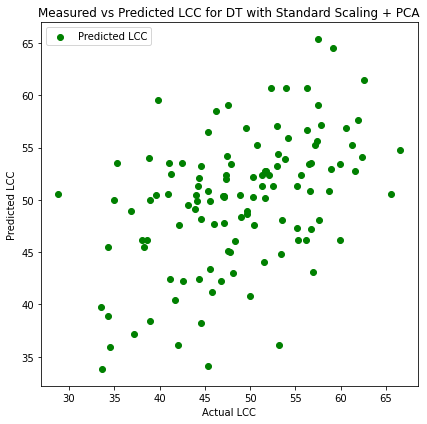

In [73]:
# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_dt_3, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for DT with Standard Scaling + PCA')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_dt_3.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_dt_3.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('dt_3_results.csv', index=False)

In [141]:
# Now look at the best parameters
grid_pipe_dt_3.best_params_

{'model__criterion': 'mse', 'model__max_features': 'auto'}

In [76]:
# Pipeline 4: Standard scaling + Truncated SVD
pipe_dt_4 = Pipeline(steps=[('scaler', standard_scaler), ('svd', svd), ('model', dt)])
grid_pipe_dt_4 = GridSearchCV(estimator=pipe_dt_4, param_grid=parameters_dt_1, cv=5, n_jobs=-1)
grid_pipe_dt_4.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_dt_4 = grid_pipe_dt_4.predict(X_test)
mse_pipe_dt_4 = mean_squared_error(y_test, y_pred_pipe_dt_4)
rmse_pipe_dt_4 = np.sqrt(mse_pipe_dt_4)
r2_pipe_dt_4 = r2_score(y_test, y_pred_pipe_dt_4)

print('MSE: ', mse_pipe_dt_4)
print('RMSE: ', rmse_pipe_dt_4)
print('R2: ', r2_pipe_dt_4)


MSE:  69.20042372881355
RMSE:  8.318679205788232
R2:  -0.1259342522723954


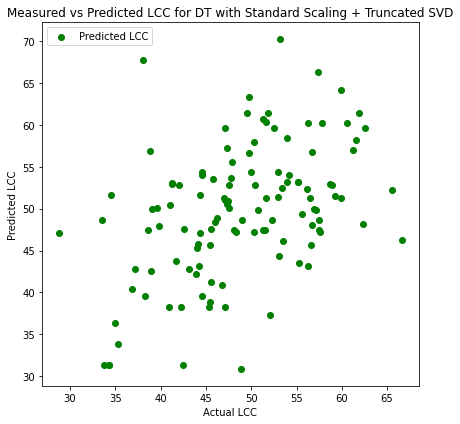

In [77]:
# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_dt_4, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for DT with Standard Scaling + Truncated SVD')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_dt_4.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_dt_4.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('dt_4_results.csv', index=False)

In [142]:
# Now look at the best parameters
grid_pipe_dt_4.best_params_

{'model__criterion': 'mae', 'model__max_features': 'sqrt'}

In [78]:
# Pipeline 5: MinMax scaling + PCA
pipe_dt_5 = Pipeline(steps=[('scaler', minmax_scaler), ('pca', pca), ('model', dt)])
grid_pipe_dt_5 = GridSearchCV(estimator=pipe_dt_5, param_grid=parameters_dt_1, cv=5, n_jobs=-1)
grid_pipe_dt_5.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_dt_5 = grid_pipe_dt_5.predict(X_test)
mse_pipe_dt_5 = mean_squared_error(y_test, y_pred_pipe_dt_5)
rmse_pipe_dt_5 = np.sqrt(mse_pipe_dt_5)
r2_pipe_dt_5 = r2_score(y_test, y_pred_pipe_dt_5)

print('MSE: ', mse_pipe_dt_5)
print('RMSE: ', rmse_pipe_dt_5)
print('R2: ', r2_pipe_dt_5)


MSE:  73.39203389830512
RMSE:  8.566915074769046
R2:  -0.19413437602451


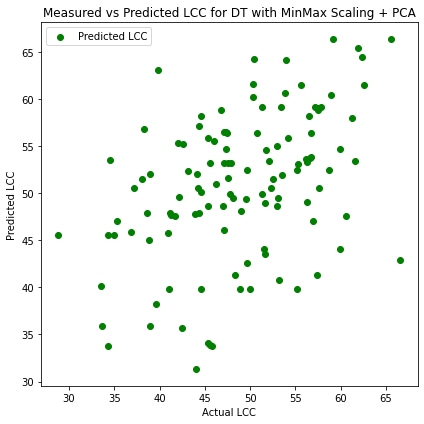

In [80]:
# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_dt_5, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for DT with MinMax Scaling + PCA')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_dt_5.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_dt_5.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('dt_5_results.csv', index=False)

In [143]:
# Now look at the best parameters
grid_pipe_dt_5.best_params_

{'model__criterion': 'mse', 'model__max_features': None}

In [81]:
# Pipeline 6: MinMax scaling + Truncated SVD
pipe_dt_6 = Pipeline(steps=[('scaler', minmax_scaler), ('svd', svd), ('model', dt)])
grid_pipe_dt_6 = GridSearchCV(estimator=pipe_dt_6, param_grid=parameters_dt_1, cv=5, n_jobs=-1)
grid_pipe_dt_6.fit(X_train, y_train)

# Predict and calculate the scores
y_pred_pipe_dt_6 = grid_pipe_dt_6.predict(X_test)
mse_pipe_dt_6 = mean_squared_error(y_test, y_pred_pipe_dt_6)
rmse_pipe_dt_6 = np.sqrt(mse_pipe_dt_6)
r2_pipe_dt_6 = r2_score(y_test, y_pred_pipe_dt_6)

print('MSE: ', mse_pipe_dt_6)
print('RMSE: ', rmse_pipe_dt_6)
print('R2: ', r2_pipe_dt_6)

MSE:  79.5477966101695
RMSE:  8.918957148129454
R2:  -0.29429249230008137


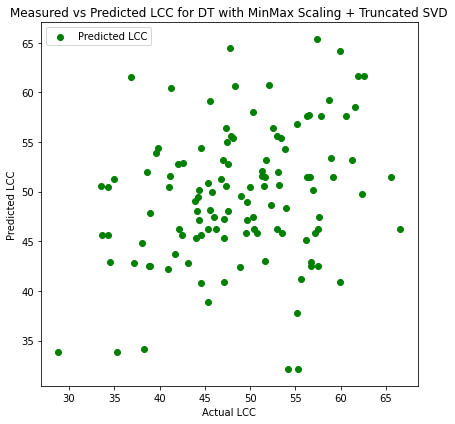

In [82]:
# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_pipe_dt_6, c='green', label='Predicted LCC')
plt.xlabel('Actual LCC')
plt.ylabel('Predicted LCC')
plt.title('Measured vs Predicted LCC for DT with MinMax Scaling + Truncated SVD')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_dt_6.png', dpi=300)
plt.show()

# Saving results to CSV
results = {
    'Actual LCC': y_test,
    'Predicted LCC': y_pred_pipe_dt_6.flatten()
}
df_results = pd.DataFrame(results)
df_results.to_csv('dt_6_results.csv', index=False)

In [144]:
# Now look at the best parameters
grid_pipe_dt_6.best_params_

{'model__criterion': 'mse', 'model__max_features': 'sqrt'}

In [169]:

# Printing scores for each pipeline for better visualization 
y_preds_dt = [
    grid_pipe_dt_1.predict(X_test),
    grid_pipe_dt_2.predict(X_test),
    grid_pipe_dt_3.predict(X_test),
    grid_pipe_dt_4.predict(X_test),
    grid_pipe_dt_5.predict(X_test),
    grid_pipe_dt_6.predict(X_test)
]

# Plotting each scatter plot
for i, y_pred in enumerate(y_preds_dt):
    
    # Calculate and print scores
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Pipeline {i+1} Results for Decision Tree:')
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    print('-----------------------')

Pipeline 1 Results for Decision Tree:
MSE:  68.92601694915255
RMSE:  8.30216941221706
R2:  -0.12146948203505015
-----------------------
Pipeline 2 Results for Decision Tree:
MSE:  63.700338983050855
RMSE:  7.981249211937368
R2:  -0.036444427326762785
-----------------------
Pipeline 3 Results for Decision Tree:
MSE:  56.5634745762712
RMSE:  7.52086926998942
R2:  0.07967682824397526
-----------------------
Pipeline 4 Results for Decision Tree:
MSE:  69.20042372881355
RMSE:  8.318679205788232
R2:  -0.1259342522723954
-----------------------
Pipeline 5 Results for Decision Tree:
MSE:  73.39203389830512
RMSE:  8.566915074769046
R2:  -0.19413437602451
-----------------------
Pipeline 6 Results for Decision Tree:
MSE:  79.5477966101695
RMSE:  8.918957148129454
R2:  -0.29429249230008137
-----------------------


# Random Forest Pipelines

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest object
rf = RandomForestRegressor()

# Define the parameter search space
parameters_rf = {
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__criterion': ['mse', 'mae'],
    'model__max_features': ['auto', 'sqrt', 'log2']
}


In [99]:
 # Function to predict, calculate scores, plot scatter, and save to CSV
def process_pipeline(grid_pipe, pipe_num):
    # Predict
    y_pred = grid_pipe.predict(X_test)
    
    # Calculate scores
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Pipeline {pipe_num} Results:')
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    
    # Scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, c='green', label='Predicted LCC')
    plt.xlabel('Measured LCC ug/cm2')
    plt.ylabel('Predicted LCC ug/cm2')
    plt.title(f'Measured vs Predicted LCC for RF Pipeline {pipe_num}')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig(f'scatter_plot_rf_{pipe_num}.png', dpi=300)
    plt.show()
    
    # Save results to CSV
    results = {
        'Actual LCC': y_test,
        'Predicted LCC': y_pred.flatten()
    }
    df_results = pd.DataFrame(results)
    df_results.to_csv(f'rf_{pipe_num}_results.csv', index=False)

Pipeline 1 Results:
MSE:  37.58277552118647
RMSE:  6.130479224431518
R2:  0.38850469441346747


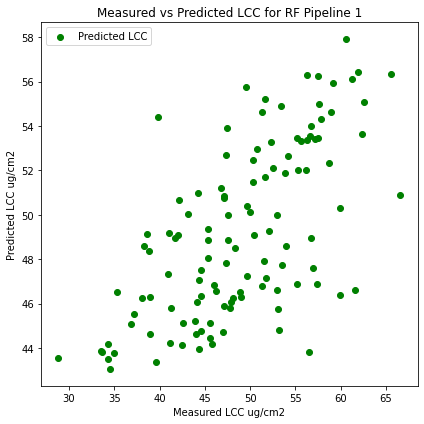

In [100]:
# Pipeline 1: No scaling + PCA
pipe_rf_1 = Pipeline(steps=[('pca', pca), ('model', rf)])
grid_pipe_rf_1 = GridSearchCV(estimator=pipe_rf_1, param_grid=parameters_rf, cv=5, n_jobs=-1)
grid_pipe_rf_1.fit(X_train, y_train)
process_pipeline(grid_pipe_rf_1, 1)

In [145]:
# Now look at the best parameters
grid_pipe_rf_1.best_params_

{'model__criterion': 'mse',
 'model__max_features': 'auto',
 'model__n_estimators': 200}

Pipeline 2 Results:
MSE:  42.39577258309797
RMSE:  6.511203620153341
R2:  0.31019421658562507


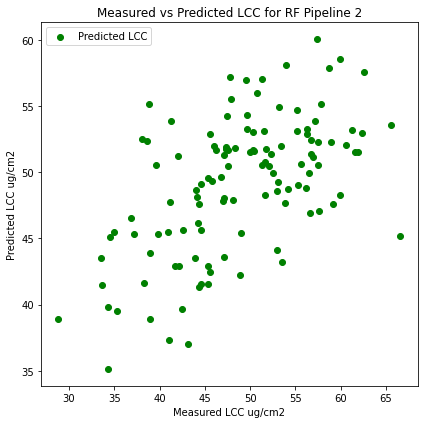

In [101]:
# Pipeline 2: No scaling + Truncated SVD
pipe_rf_2 = Pipeline(steps=[('svd', svd), ('model', rf)])
grid_pipe_rf_2 = GridSearchCV(estimator=pipe_rf_2, param_grid=parameters_rf, cv=5, n_jobs=-1)
grid_pipe_rf_2.fit(X_train, y_train)
process_pipeline(grid_pipe_rf_2, 2)


In [146]:
# Now look at the best parameters
grid_pipe_rf_2.best_params_

{'model__criterion': 'mae',
 'model__max_features': 'sqrt',
 'model__n_estimators': 300}

Pipeline 3 Results:
MSE:  36.319798355932214
RMSE:  6.026590939820971
R2:  0.40905412422289167


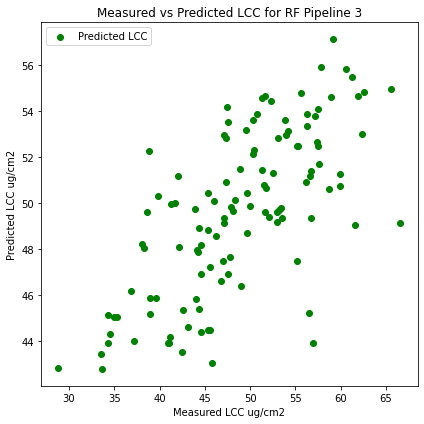

In [105]:
# Pipeline 3: Standard scaling + PCA
pipe_rf_3 = Pipeline(steps=[('scaler', standard_scaler), ('pca', pca), ('model', rf)])
grid_pipe_rf_3 = GridSearchCV(estimator=pipe_rf_3, param_grid=parameters_rf, cv=5, n_jobs=-1)
grid_pipe_rf_3.fit(X_train, y_train)
process_pipeline(grid_pipe_rf_3, 3)


In [147]:
# Now look at the best parameters
grid_pipe_rf_3.best_params_

{'model__criterion': 'mae',
 'model__max_features': 'auto',
 'model__n_estimators': 100}

Pipeline 4 Results:
MSE:  44.89235267796606
RMSE:  6.7001755706821635
R2:  0.26957329418536213


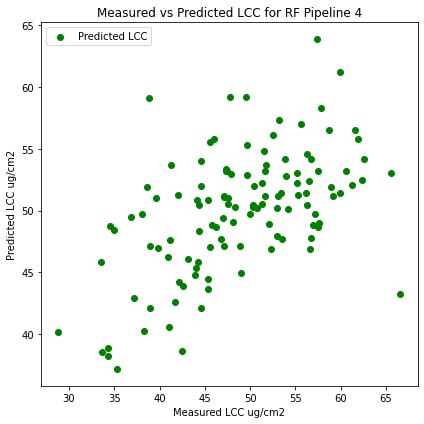

In [102]:
# Pipeline 4: Standard scaling + Truncated SVD
pipe_rf_4 = Pipeline(steps=[('scaler', standard_scaler), ('svd', svd), ('model', rf)])
grid_pipe_rf_4 = GridSearchCV(estimator=pipe_rf_4, param_grid=parameters_rf, cv=5, n_jobs=-1)
grid_pipe_rf_4.fit(X_train, y_train)
process_pipeline(grid_pipe_rf_4, 4)

In [148]:
# Now look at the best parameters
grid_pipe_rf_4.best_params_

{'model__criterion': 'mse',
 'model__max_features': 'log2',
 'model__n_estimators': 100}

Pipeline 5 Results:
MSE:  35.19299639618643
RMSE:  5.932368531723769
R2:  0.42738789811678146


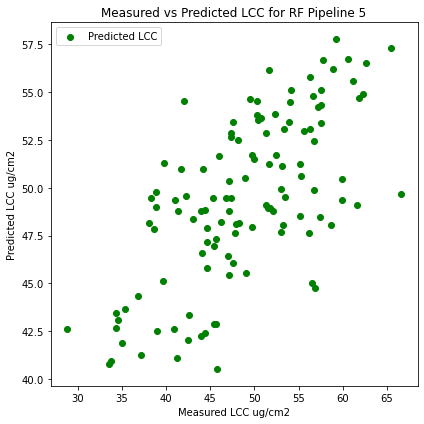

In [103]:
# Pipeline 5: MinMax scaling + PCA
pipe_rf_5 = Pipeline(steps=[('scaler', minmax_scaler), ('pca', pca), ('model', rf)])
grid_pipe_rf_5 = GridSearchCV(estimator=pipe_rf_5, param_grid=parameters_rf, cv=5, n_jobs=-1)
grid_pipe_rf_5.fit(X_train, y_train)
process_pipeline(grid_pipe_rf_5, 5)

In [149]:
# Now look at the best parameters
grid_pipe_rf_5.best_params_

{'model__criterion': 'mse',
 'model__max_features': 'auto',
 'model__n_estimators': 200}

Pipeline 6 Results:
MSE:  47.37396300887175
RMSE:  6.882874618128079
R2:  0.22919593922422


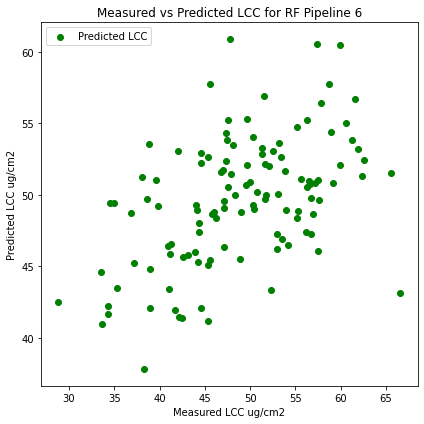

In [104]:
# Pipeline 6: MinMax scaling + Truncated SVD
pipe_rf_6 = Pipeline(steps=[('scaler', minmax_scaler), ('svd', svd), ('model', rf)])
grid_pipe_rf_6 = GridSearchCV(estimator=pipe_rf_6, param_grid=parameters_rf, cv=5, n_jobs=-1)
grid_pipe_rf_6.fit(X_train, y_train)
process_pipeline(grid_pipe_rf_6, 6)

In [150]:
# Now look at the best parameters
grid_pipe_rf_6.best_params_

{'model__criterion': 'mae',
 'model__max_features': 'sqrt',
 'model__n_estimators': 400}

In [168]:
# Predictions from each pipeline for Random Forest for better visualization 
y_preds_rf = [
    grid_pipe_rf_1.predict(X_test),
    grid_pipe_rf_2.predict(X_test),
    grid_pipe_rf_3.predict(X_test),
    grid_pipe_rf_4.predict(X_test),
    grid_pipe_rf_5.predict(X_test),
    grid_pipe_rf_6.predict(X_test)
]

# Plotting each scatter plot
for i, y_pred in enumerate(y_preds_rf):

    # Calculate and print scores
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Pipeline {i+1} Results for Random Forest:')
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    print('-----------------------')


Pipeline 1 Results for Random Forest:
MSE:  37.58277552118647
RMSE:  6.130479224431518
R2:  0.38850469441346747
-----------------------
Pipeline 2 Results for Random Forest:
MSE:  42.39577258309797
RMSE:  6.511203620153341
R2:  0.31019421658562507
-----------------------
Pipeline 3 Results for Random Forest:
MSE:  36.319798355932214
RMSE:  6.026590939820971
R2:  0.40905412422289167
-----------------------
Pipeline 4 Results for Random Forest:
MSE:  44.89235267796606
RMSE:  6.7001755706821635
R2:  0.26957329418536213
-----------------------
Pipeline 5 Results for Random Forest:
MSE:  35.19299639618643
RMSE:  5.932368531723769
R2:  0.42738789811678146
-----------------------
Pipeline 6 Results for Random Forest:
MSE:  47.37396300887175
RMSE:  6.882874618128079
R2:  0.22919593922422
-----------------------


# SVM Pipelines

In [107]:
from sklearn.svm import SVR

# Define the SVM object
svm = SVR()

# Define the parameter search space for SVM

parameters_svm = {
    'model__kernel': ['rbf', 'linear'],
    'model__C': [2**i for i in range(-5, 11)],
    'model__gamma': ['scale', 'auto']
}

In [110]:
# Function to predict, calculate scores, plot scatter, and save to CSV
def process_pipeline_svm(grid_pipe, pipe_num):
    # Predict
    y_pred = grid_pipe.predict(X_test)
    
    # Calculate scores
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Pipeline {pipe_num} Results:')
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    
    # Scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, c='green', label='Predicted LCC')
    plt.xlabel('Measured LCC ug/cm2')
    plt.ylabel('Predicted LCC ug/cm2')
    plt.title(f'Measured vs Predicted LCC for SVM Pipeline {pipe_num}')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig(f'scatter_plot_svm_{pipe_num}.png', dpi=300)
    plt.show()
    
    # Save results to CSV
    results = {
        'Actual LCC': y_test,
        'Predicted LCC': y_pred.flatten()
    }
    df_results = pd.DataFrame(results)
    df_results.to_csv(f'svm_{pipe_num}_results.csv', index=False)




Pipeline 1 Results:
MSE:  20.077367058910195
RMSE:  4.480777506070815
R2:  0.6733286582801673


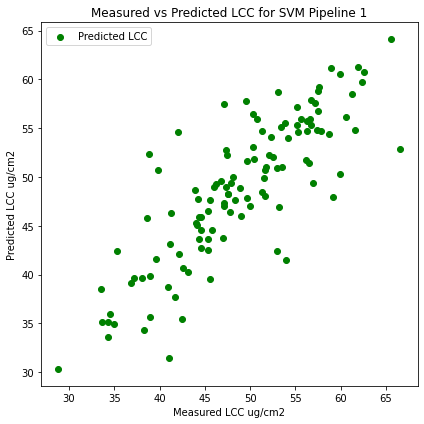

Pipeline 2 Results:
MSE:  39.951089729756866
RMSE:  6.320687441232707
R2:  0.349970738349518


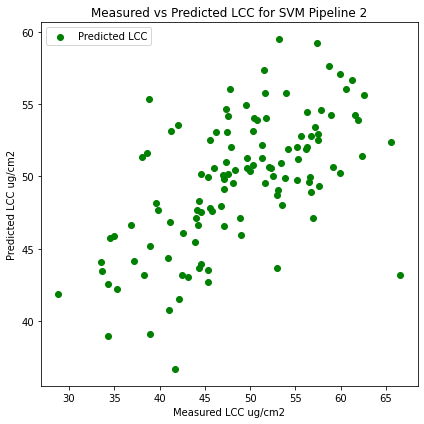

Pipeline 3 Results:
MSE:  21.68694858739037
RMSE:  4.656924799413274
R2:  0.6471397583126922


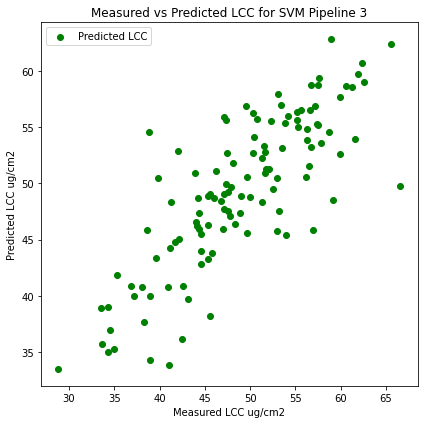

Pipeline 4 Results:
MSE:  43.636474013980305
RMSE:  6.605790945373635
R2:  0.29000722693151204


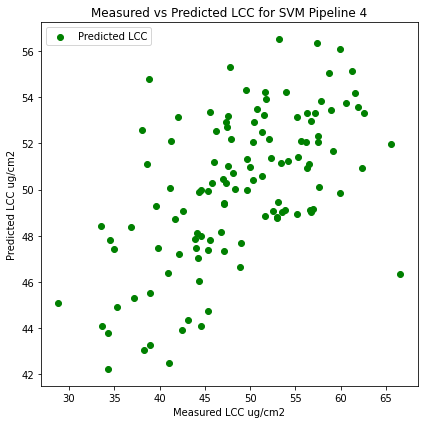

Pipeline 5 Results:
MSE:  19.22739646708965
RMSE:  4.384905525446318
R2:  0.6871582123665032


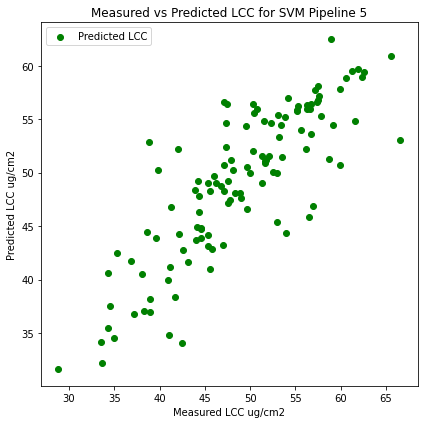

Pipeline 6 Results:
MSE:  42.67596322908185
RMSE:  6.532684228483866
R2:  0.30563533921926833


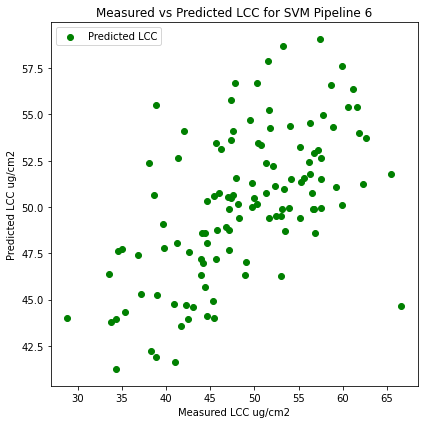

In [111]:
# Pipeline 1: No scaling + PCA
pipe_svm_1 = Pipeline(steps=[('pca', pca), ('model', svm)])
grid_pipe_svm_1 = GridSearchCV(estimator=pipe_svm_1, param_grid=parameters_svm, cv=5, n_jobs=-1)
grid_pipe_svm_1.fit(X_train, y_train)
process_pipeline_svm(grid_pipe_svm_1, 1)

# Pipeline 2: No scaling + Truncated SVD
pipe_svm_2 = Pipeline(steps=[('svd', svd), ('model', svm)])
grid_pipe_svm_2 = GridSearchCV(estimator=pipe_svm_2, param_grid=parameters_svm, cv=5, n_jobs=-1)
grid_pipe_svm_2.fit(X_train, y_train)
process_pipeline_svm(grid_pipe_svm_2, 2)

# Pipeline 3: Standard scaling + PCA
pipe_svm_3 = Pipeline(steps=[('standard_scaler', standard_scaler), ('pca', pca), ('model', svm)])
grid_pipe_svm_3 = GridSearchCV(estimator=pipe_svm_3, param_grid=parameters_svm, cv=5, n_jobs=-1)
grid_pipe_svm_3.fit(X_train, y_train)
process_pipeline_svm(grid_pipe_svm_3, 3)

# Pipeline 4: Standard scaling + Truncated SVD
pipe_svm_4 = Pipeline(steps=[('standard_scaler', standard_scaler), ('svd', svd), ('model', svm)])
grid_pipe_svm_4 = GridSearchCV(estimator=pipe_svm_4, param_grid=parameters_svm, cv=5, n_jobs=-1)
grid_pipe_svm_4.fit(X_train, y_train)
process_pipeline_svm(grid_pipe_svm_4, 4)

# Pipeline 5: MinMax scaling + PCA
pipe_svm_5 = Pipeline(steps=[('minmax_scaler', minmax_scaler), ('pca', pca), ('model', svm)])
grid_pipe_svm_5 = GridSearchCV(estimator=pipe_svm_5, param_grid=parameters_svm, cv=5, n_jobs=-1)
grid_pipe_svm_5.fit(X_train, y_train)
process_pipeline_svm(grid_pipe_svm_5, 5)

# Pipeline 6: MinMax scaling + Truncated SVD
pipe_svm_6 = Pipeline(steps=[('minmax_scaler', minmax_scaler), ('svd', svd), ('model', svm)])
grid_pipe_svm_6 = GridSearchCV(estimator=pipe_svm_6, param_grid=parameters_svm, cv=5, n_jobs=-1)
grid_pipe_svm_6.fit(X_train, y_train)
process_pipeline_svm(grid_pipe_svm_6, 6)



In [160]:
# Now look at the best parameters
grid_pipe_svm_1.best_params_

{'model__C': 16, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

In [161]:
# Now look at the best parameters
grid_pipe_svm_2.best_params_


{'model__C': 256, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

In [162]:
# Now look at the best parameters
grid_pipe_svm_3.best_params_

{'model__C': 64, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

In [163]:
# Now look at the best parameters
grid_pipe_svm_4.best_params_

{'model__C': 2, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

In [164]:
# Now look at the best parameters
grid_pipe_svm_5.best_params_

{'model__C': 256, 'model__gamma': 'auto', 'model__kernel': 'rbf'}

In [165]:
# Now look at the best parameters
grid_pipe_svm_6.best_params_

{'model__C': 16, 'model__gamma': 'scale', 'model__kernel': 'rbf'}

In [167]:

# Printing the scores from all six pipelines for better visualization
y_preds = [
    grid_pipe_svm_1.predict(X_test),
    grid_pipe_svm_2.predict(X_test),
    grid_pipe_svm_3.predict(X_test),
    grid_pipe_svm_4.predict(X_test),
    grid_pipe_svm_5.predict(X_test),
    grid_pipe_svm_6.predict(X_test)
]

# Plotting each scatter plot
for i, y_pred in enumerate(y_preds):
    
    # Calculate and print scores
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Pipeline {i+1} Results:')
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('R2: ', r2)
    print('-----------------------')
    


Pipeline 1 Results:
MSE:  20.077367058910195
RMSE:  4.480777506070815
R2:  0.6733286582801673
-----------------------
Pipeline 2 Results:
MSE:  39.951089729756866
RMSE:  6.320687441232707
R2:  0.349970738349518
-----------------------
Pipeline 3 Results:
MSE:  21.68694858739037
RMSE:  4.656924799413274
R2:  0.6471397583126922
-----------------------
Pipeline 4 Results:
MSE:  43.636474013980305
RMSE:  6.605790945373635
R2:  0.29000722693151204
-----------------------
Pipeline 5 Results:
MSE:  19.22739646708965
RMSE:  4.384905525446318
R2:  0.6871582123665032
-----------------------
Pipeline 6 Results:
MSE:  42.67596322908185
RMSE:  6.532684228483866
R2:  0.30563533921926833
-----------------------


In [ ]:
Scatter plots of the best models 

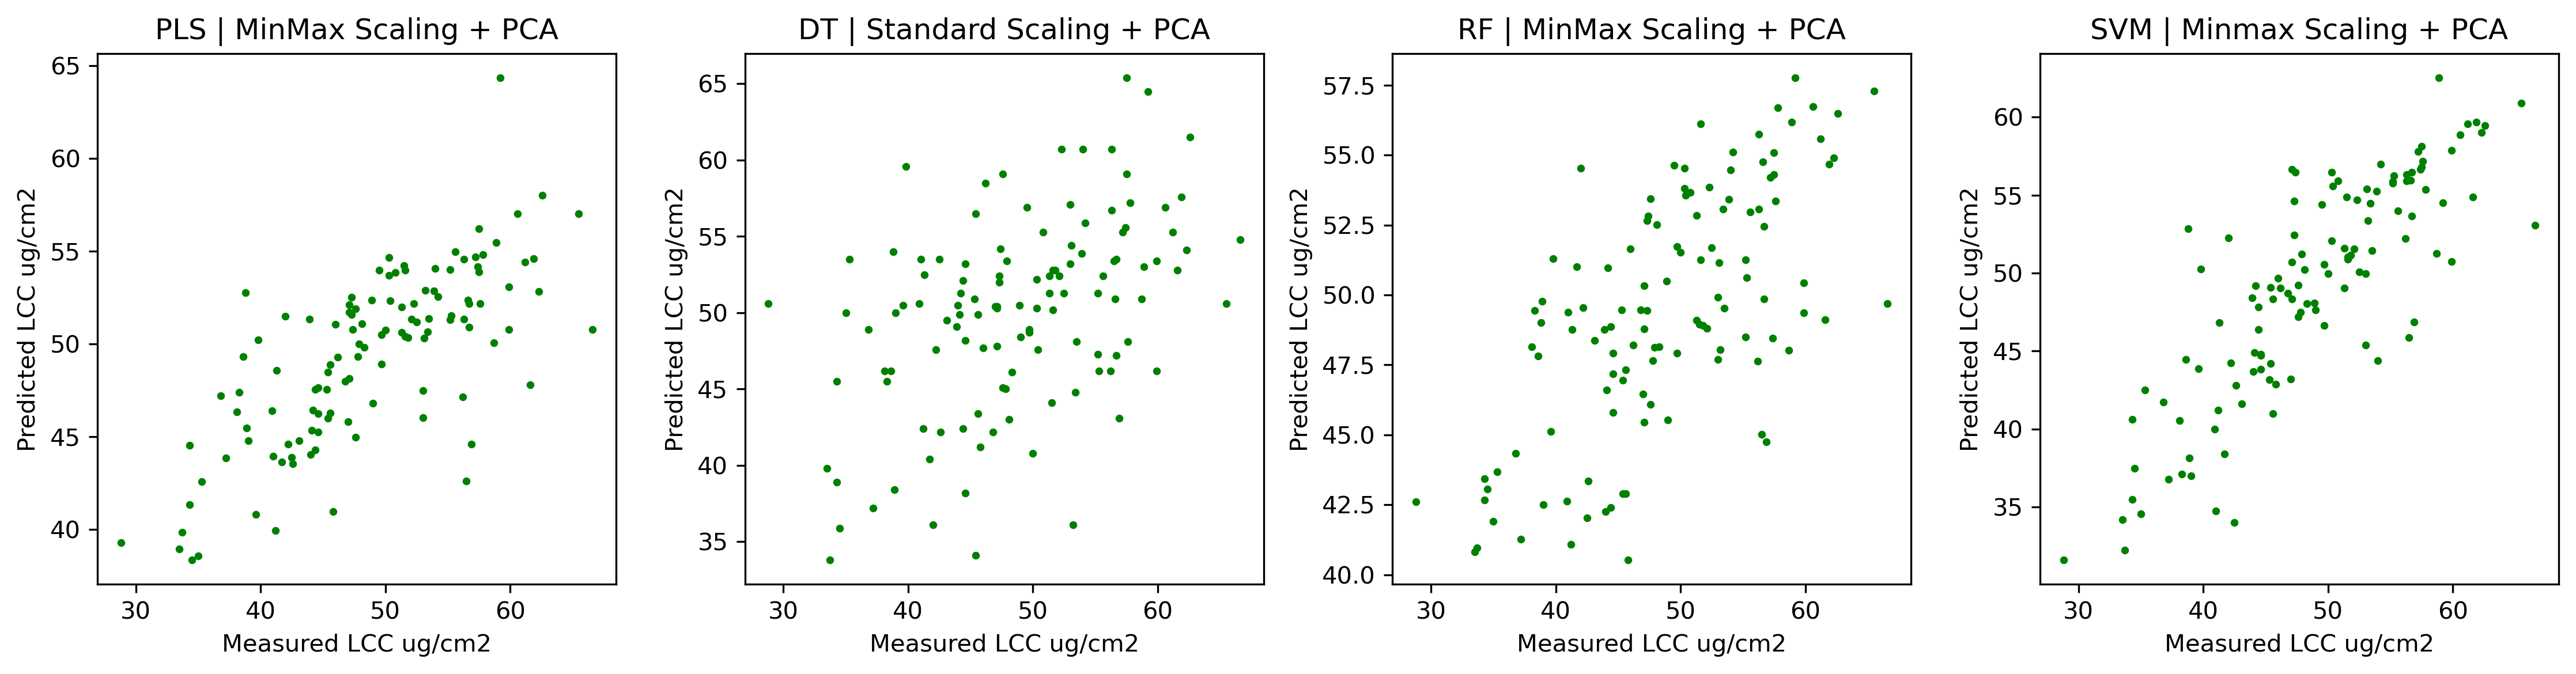

In [166]:

# Create a figure and axes
fig, axs = plt.subplots(1, 4, figsize=(15, 4), dpi = 300)  

# Predictions from each pipeline for PLS
y_pred_pls = grid_pipe_pls_5.predict(X_test),
y_pred_dt = grid_pipe_dt_3.predict(X_test),
y_pred_rf = grid_pipe_rf_5.predict(X_test),
y_pred_svm = grid_pipe_svm_5.predict(X_test)
    

# Plotting each scatter plot

axs[0].scatter(y_test, y_pred_pls, color='green', s=5)
axs[0].set_title('PLS | MinMax Scaling + PCA')
axs[0].set_xlabel('Measured LCC ug/cm2')
axs[0].set_ylabel('Predicted LCC ug/cm2')

axs[1].scatter(y_test, y_pred_dt, color='green', s=5)
axs[1].set_title('DT | Standard Scaling + PCA')
axs[1].set_xlabel('Measured LCC ug/cm2')
axs[1].set_ylabel('Predicted LCC ug/cm2')

axs[2].scatter(y_test, y_pred_rf, color='green', s=5)
axs[2].set_title('RF | MinMax Scaling + PCA')
axs[2].set_xlabel('Measured LCC ug/cm2')
axs[2].set_ylabel('Predicted LCC ug/cm2')

axs[3].scatter(y_test, y_pred_svm, color='green', s=5)
axs[3].set_title('SVM | Minmax Scaling + PCA')
axs[3].set_xlabel('Measured LCC ug/cm2')
axs[3].set_ylabel('Predicted LCC ug/cm2')

plt.tight_layout()
plt.savefig('scatterplots_part2.png')


plt.show()
